In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)


In [3]:
df = pd.read_csv("retail_sales_data.csv")
df.head()


,Order ID,Product,Category,Sales,Quantity,Discount,Profit,Region,Segment,Order Date
0,ORD-1000,Phone,Furniture,84.90,4,0.10,22.547994,South,Home Office,2022-04-29
1,ORD-1001,Binder,Office Supplies,130.52,2,0.03,8.466750,Central,Corporate,2022-06-05
2,ORD-1002,Notebook,Office Supplies,88.73,7,0.19,12.913494,East,Consumer,2023-11-18
3,ORD-1003,Binder,Furniture,101.42,2,0.18,7.887409,South,Consumer,2023-04-10
4,ORD-1004,Binder,Technology,149.70,1,0.50,21.906285,West,Corporate,2022-04-14


In [4]:
df.info()
df.describe()

df["Order Date"] = pd.to_datetime(df["Order Date"])
df["Month"] = df["Order Date"].dt.to_period("M")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Order ID    500 non-null    object 
 1   Product     500 non-null    object 
 2   Category    500 non-null    object 
 3   Sales       500 non-null    float64
 4   Quantity    500 non-null    int64  
 5   Discount    500 non-null    float64
 6   Profit      500 non-null    float64
 7   Region      500 non-null    object 
 8   Segment     500 non-null    object 
 9   Order Date  500 non-null    object 
dtypes: float64(3), int64(1), object(6)
memory usage: 39.2+ KB


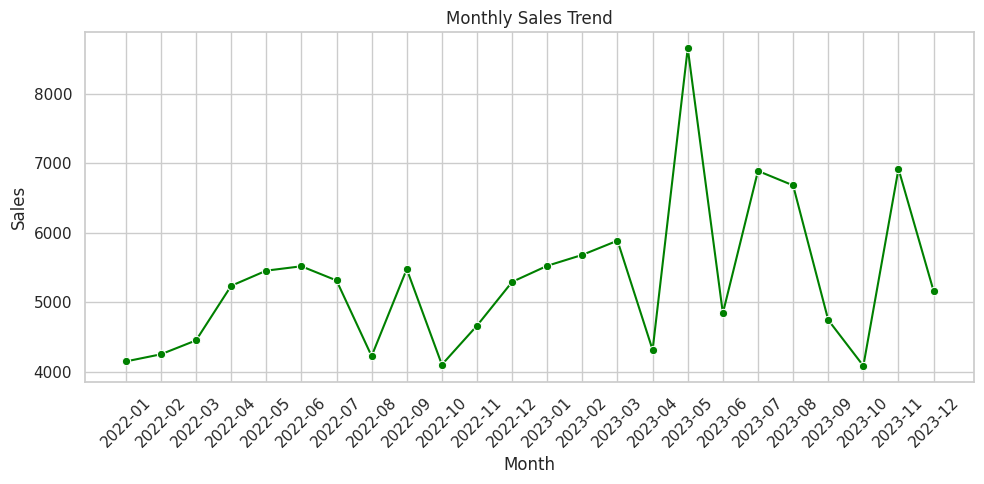

In [5]:
monthly_sales = df.groupby("Month")["Sales"].sum().reset_index()
monthly_sales["Month"] = monthly_sales["Month"].astype(str)

sns.lineplot(data=monthly_sales, x="Month", y="Sales", marker="o", color="green")
plt.title("Monthly Sales Trend")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipython-input-6-2469070.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_profit, x="Category", y="Profit", palette="viridis")


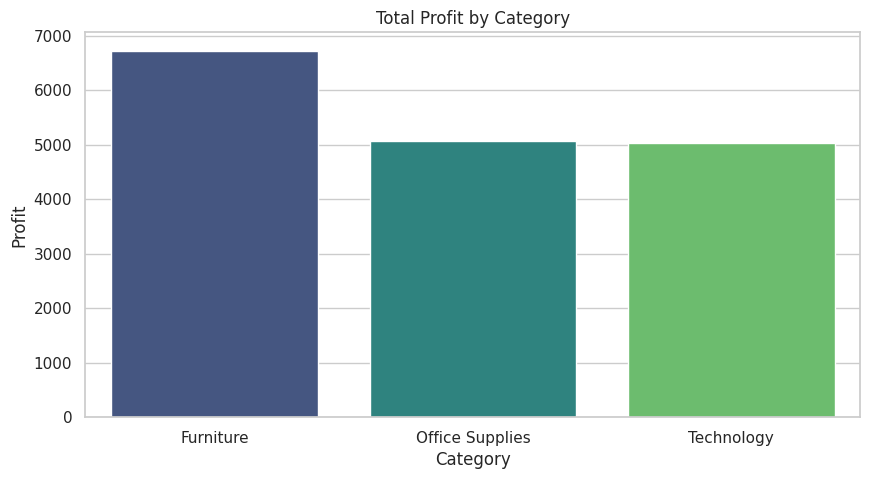

In [6]:
category_profit = df.groupby("Category")["Profit"].sum().reset_index()

sns.barplot(data=category_profit, x="Category", y="Profit", palette="viridis")
plt.title("Total Profit by Category")
plt.show()


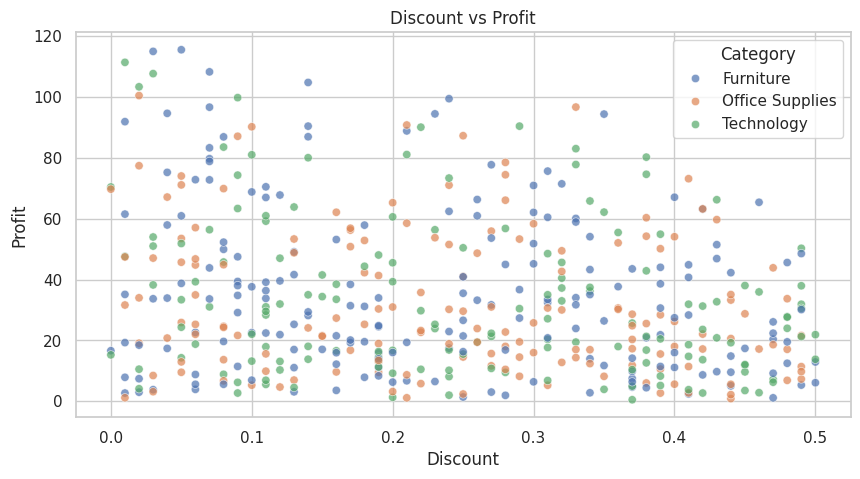

In [7]:
sns.scatterplot(data=df, x="Discount", y="Profit", hue="Category", alpha=0.7)
plt.title("Discount vs Profit")
plt.show()


/tmp/ipython-input-8-246853222.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_sales, x="Region", y="Sales", palette="mako")


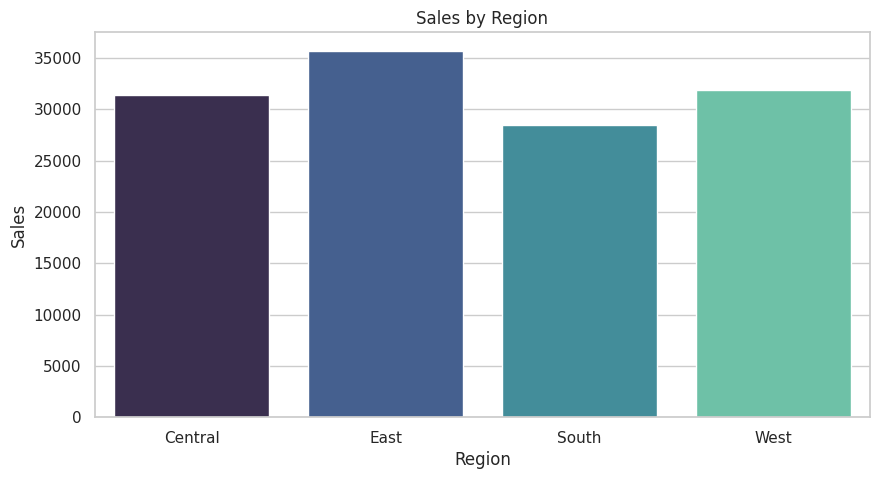

In [8]:
# @title Default title text
region_sales = df.groupby("Region")["Sales"].sum().reset_index()

sns.barplot(data=region_sales, x="Region", y="Sales", palette="mako")
plt.title("Sales by Region")
plt.show()
